## 1. Evaluar juicios de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

1.- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
  - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
  - Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
  - Con un valor de prueba y un puntaje de corte de 2.58, ¿qué se debe concluir?
  
Considerando un intervalo de confianza del 5%

2.- Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?

Se debe hacer un estudio de la muestra. Esto porque si consideramos la hipótesis nula:
- H0: Consumo hombres >= Consumo mujeres
- H1: Consumo hombres < Consumo mujeres
pero M=Ch + Cm = 48, y no podemos saber de cuánto es el valor de la submuestra, por lo tanto se debe utilizar el estudio de la t-student


## 2. Importe la base de datos utilizada la sesión presencial anterior

- Agrege una serie de variables binarias por cada continente de la variable region.
   - tip: Utilice np.where para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
   - Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
   - Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school .

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=(6,4)
#plt.rcParams['figure.dpi']=100

In [12]:
df = pd.read_csv('nations.csv', encoding='latin-1')
df.columns

Index(['Unnamed: 0', 'country', 'region', 'gdp', 'school', 'adfert',
       'chldmort', 'life', 'pop', 'urban', 'femlab', 'literacy', 'co2',
       'gini'],
      dtype='object')

In [13]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [14]:
lista_region=df['region'].unique()
lista_region

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [15]:
df['Africa']=np.where(df['region']=='Africa',1,0)
df['Europe']=np.where(df['region']=='Europe',1,0)
df['Oceania']=np.where(df['region']=='Oceania',1,0)
df['Americas']=np.where(df['region']=='Americas',1,0)
df['Asia']=np.where(df['region']=='Asia',1,0)
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa,Europe,Oceania,Americas,Asia
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


In [16]:
df_nz=df.loc[:,['country', 'region', 'gdp', 'school','pop', 'urban', 'femlab', 'literacy', 'co2','gini','Africa', 'Americas', 'Asia', 'Europe', 'Oceania']]
lista_variables=df_nz.columns
lista_variables

Index(['country', 'region', 'gdp', 'school', 'pop', 'urban', 'femlab',
       'literacy', 'co2', 'gini', 'Africa', 'Americas', 'Asia', 'Europe',
       'Oceania'],
      dtype='object')

## 3. Implemente una función de prueba de hipótesis a mano

La función debe ingresar los siguientes argumentos:
- df : La tabla de datos.
- variable : La variable a analizar.
- binarize : El indicador binario a utilizar.

tips:
Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().

- Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
- Reporte las medias para cada grupo (0 y 1).
- Reporte la diferencia de entre las medias.
- Reporte los valores t y p

In [17]:
def prueba_hipotesis(df,variable,binarize):
    tmp1=df[df[binarize]==0][variable].dropna()
    tmp2=df[df[binarize]==1][variable].dropna()
    valort,valorp=stats.ttest_ind(tmp1, tmp2)
    mean1=tmp1.mean()
    mean2=tmp2.mean()
    dif=mean1-mean2
    print('Para la variable ',variable,' y el continente ',binarize)
    print('La media del grupo 0 es ', mean1, '\nLa media del grupo 1 es ', mean2,'\nLa diferencia entre las medias es ',dif)
    print('El valor de p es ', valorp,'\nEl valor de t es ',valort)
    print()

In [18]:
prueba_hipotesis(df,'femlab','Africa')

Para la variable  femlab  y el continente  Africa
La media del grupo 0 es  0.676101588186 
La media del grupo 1 es  0.729909801016 
La diferencia entre las medias es  -0.0538082128298
El valor de p es  0.0761771840436 
El valor de t es  -1.78387287827



In [19]:
for pais in lista_region:
    prueba_hipotesis(df,'femlab',pais)

Para la variable  femlab  y el continente  Africa
La media del grupo 0 es  0.676101588186 
La media del grupo 1 es  0.729909801016 
La diferencia entre las medias es  -0.0538082128298
El valor de p es  0.0761771840436 
El valor de t es  -1.78387287827

Para la variable  femlab  y el continente  Americas
La media del grupo 0 es  0.700280820772 
La media del grupo 1 es  0.650748391305 
La diferencia entre las medias es  0.049532429467
El valor de p es  0.17147454301 
El valor de t es  1.37311134087

Para la variable  femlab  y el continente  Asia
La media del grupo 0 es  0.722342186375 
La media del grupo 1 es  0.611314287903 
La diferencia entre las medias es  0.111027898471
El valor de p es  0.000244132575194 
El valor de t es  3.74551965953

Para la variable  femlab  y el continente  Europe
La media del grupo 0 es  0.670455715592 
La media del grupo 1 es  0.771632426494 
La diferencia entre las medias es  -0.101176710901
El valor de p es  0.00253356048345 
El valor de t es  -3.0635237

Para la variable  school  y el continente  Africa
La media del grupo 0 es  8.5523114274 
La media del grupo 1 es  4.5228758279 
La diferencia entre las medias es  4.0294355995
El valor de p es  2.63528304567e-20 
El valor de t es  10.4158118318

Para la variable  school  y el continente  Americas
La media del grupo 0 es  7.3188453266 
La media del grupo 1 es  8.07285708019 
La diferencia entre las medias es  -0.754011753583
El valor de p es  0.174584649868 
El valor de t es  -1.36282717457

Para la variable  school  y el continente  Asia
La media del grupo 0 es  7.52714284658 
La media del grupo 1 es  7.26111113032 
La diferencia entre las medias es  0.266031716267
El valor de p es  0.592331357865 
El valor de t es  0.536387999652

Para la variable  school  y el continente  Europe
La media del grupo 0 es  6.63299320344 
La media del grupo 1 es  10.4215446798 
La diferencia entre las medias es  -3.78855147634
El valor de p es  5.20910302336e-15 
El valor de t es  -8.52434621773

Para la

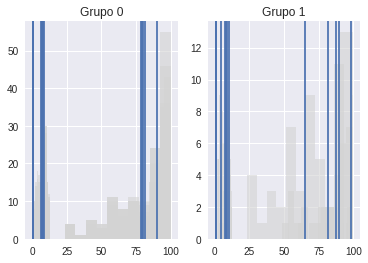

In [23]:
lista=['school','femlab', 'literacy']
for var1 in lista:
    for region in lista_region:
        prueba_hipotesis(df,var1,region)
        funcion_grafico(df,var1,region)

## 4. Implemente una función que grafique los histogramas para ambas muestras.

- Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.

tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot .

- Incluya los argumentos alpha y label .
- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto

In [22]:
def funcion_grafico(df,variable,binarize):
    tmp1=df[df[binarize]==0][variable].dropna()
    tmp2=df[df[binarize]==1][variable].dropna()
    #Gráfico 1
    plt.subplot(1, 2, 1)
    plt.hist(tmp1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(tmp1))
    plt.title("Grupo 0".format(variable, round(np.mean(tmp1), 3)))
    
    #Gráfico 2
    plt.subplot(1, 2, 2)
    plt.hist(tmp2, alpha=.6, color='lightgrey',label = 'hola2')
    plt.axvline(np.mean(tmp2))
    '''    plt.ylabel(str(variable))
    plt.xlabel(str(binarize))'''
    plt.title("Grupo 1".format(variable, round(np.mean(tmp2), 3)))
    return

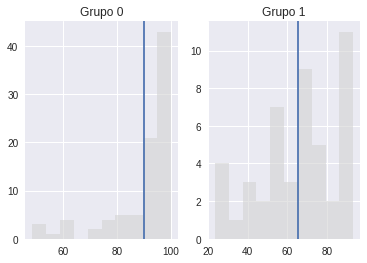

In [24]:
funcion_grafico(df,'literacy','Africa')

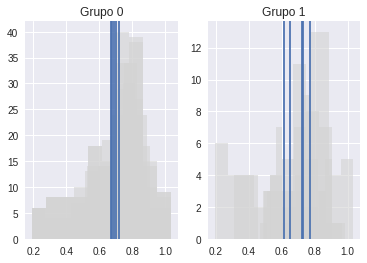

In [27]:
for pais in lista_region:
    funcion_graficorefactor(df,'femlab',pais)

In [26]:
def funcion_graficorefactor(df,variable,binarize):
   
        tmp1=df[df[binarize]==0][variable].dropna()
        tmp2=df[df[binarize]==1][variable].dropna()
        
        #Gráfico 1
        plt.subplot(1, 2, 1)
        plt.hist(tmp1, alpha=.6, color='lightgrey')
        plt.axvline(np.mean(tmp1))
        plt.title("Grupo 0".format(variable, round(np.mean(tmp1), 3)))
        #Gráfico 2
        plt.subplot(1, 2, 2)
        plt.hist(tmp2, alpha=.6, color='lightgrey',label = 'hola2')
        plt.axvline(np.mean(tmp2))
        '''    plt.ylabel(str(variable))
        plt.xlabel(str(binarize))'''
        plt.title("Grupo 1".format(variable, round(np.mean(tmp2), 3)))
        return